In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
# Separate dataframe into x values and y values

X = df.drop('sales', axis = 1)
y = df['sales']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Create instance of LinearRegression class

model = LinearRegression()

In [17]:
# Fit model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [19]:
# Now create the predictions for the X_test values

test_predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
# Compute errors

MAE = mean_absolute_error(y_test,test_predictions)  # Mean Absolute Error
MSE = mean_squared_error(y_test,test_predictions)   # Mean Squared Error
RMSE = np.sqrt(MSE)                                 # Root Mean Squared Error

In [37]:
MAE, MSE, RMSE

(1.2137457736144808, 2.2987166978863782, 1.516151937599388)

In [38]:
df['sales'].mean()

14.022500000000003

In [39]:
# Now we retrain on the full data. 

full_model = LinearRegression()

In [40]:
full_model.fit(X,y)

LinearRegression()

In [44]:
# Compare coefficients with model fitted only to the training data

model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [45]:
full_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
# Predictions for full data set
y_hat = full_model.predict(X)

In [47]:
residuals = y_hat - y

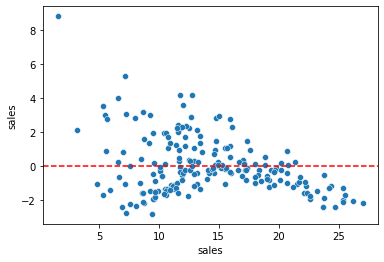

In [48]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [49]:
# Prediction on new data

campaign = [[149,22,12]]

In [51]:
full_model.predict(campaign)

array([13.893032])

In [52]:
# For TV, radio, and newspaper spending of 149, 22, 12 respectively, can expect sales of 13.89 (thousand)

In [53]:
# Saving and Loading the Model

In [54]:
from joblib import dump, load

In [56]:
dump(full_model, 'sales_model.joblib')  # This creates the file 'sales_model.joblib' in the same directory and saves the model to it.

['sales_model.joblib']

In [57]:
# Now in a different directory / notebook, can simply load the model as follows:

loaded_model = load('sales_model.joblib')

In [59]:
# Call the loaded model to make a prediction

loaded_model.predict(campaign)

array([13.893032])